In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy.stats import norm, truncnorm
from copy import copy

# cmdstan install 
from cmdstanpy import CmdStanModel

## Censored Regression (切り捨て回帰)

以下の式を実装する

$$y_i^\ast = intercept + slope \times x_i + \epsilon \quad \epsilon \sim N(0, \sigma)$$

ただし、事前分布は以下のように設定される。
- $intercept \sim N(0, 1)$
- $slope \sim N(0, 1)$
- $sigma \sim HalfNorm(0, 1)$

$$
y_i =
    \begin{cases}
        c_l        &   \text{$y_i^\ast > c_l$のとき} \\
        c_u        &   \text{$y_i^\ast < c_u$のとき} \\
        y_i^\ast   &   \text{その他}
    \end{cases}
$$

In [2]:
# シミュレーションパラメータ
slope, intercept, sigma, N = 1, 0, 2, 200
x = np.random.uniform(-10, 10, N)
y = np.random.normal(loc=slope * x + intercept, scale=sigma)

def censor_y(x, y, bounds):
    cy = copy(y)
    cy[y <= bounds[0]] = bounds[0]
    cy[y >= bounds[1]] = bounds[1]
    return (x, cy)

bounds = [-5, 5]
xt, yt = censor_y(x, y, bounds)

[Text(0.5, 1.0, 'censored data')]

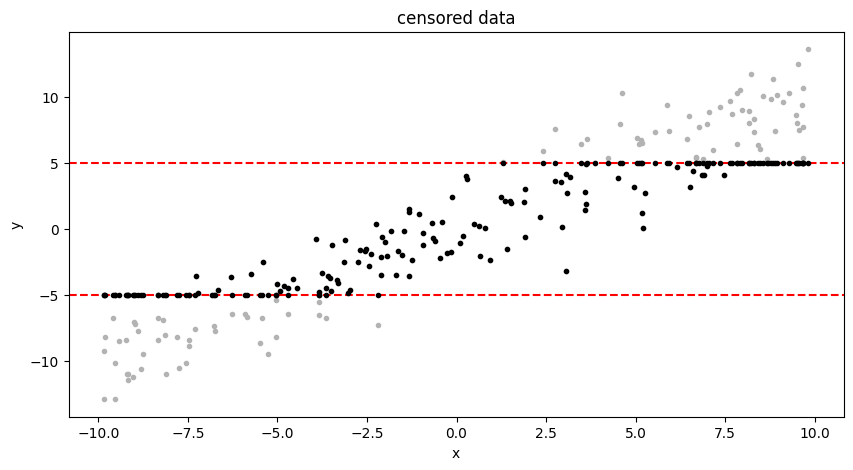

In [3]:
# プロット
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(x, y, ".", c=[0.7, 0.7, 0.7])
ax.axhline(bounds[0], c="r", ls="--")
ax.axhline(bounds[1], c="r", ls="--")
ax.set(xlabel="x", ylabel="y")
ax.plot(xt, yt, ".", c=[0, 0, 0])
ax.set(title="censored data")

# Pytanによる実装

In [4]:
stan_data = {
    "N_obs": len(yt[yt < 5]),
    "N_cens" : len(yt[yt == 5]),
    "y_obs" : yt[yt < 5],
    "U" : 5,
}

In [5]:
posterior = CmdStanModel(stan_file="../src/stan/censored_regression.stan")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 0: invalid start byte